# Tasks 1 : EDA and Visualization of a Titanic Dataset

<h2 style="font-family: 'poppins'; font-weight: bold;">👨‍💻Author: Dur-e-Yashfeen</h2>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/Dur-e-yashfeen)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/dureyashfeen)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/dur-e-yashfeen-b76a19204/) 
[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/dureyashfeen/) 

This notebook provides a comprehensive EDA on Titanic Dataset. 📈

## Objectives ✨
1. **Understand the Dataset**  
    
2. **Data Cleaning**  
   
3. **Data Visualization**  
    
4. **Summarize Insights**  
    

# Metadata for Titanic Dataset
The Titanic dataset contains passenger details to predict survival based on various features. Here's the breakdown:

### Dataset Columns and Their Descriptions:
`PassengerId` 🆔

- Unique ID assigned to each passenger



 `Survived ✅ / ❌`

- Survival status:
- 0 = Did not survive.
- 1 = Survived.

`Pclass 🛳️`

- Ticket class of the passenger:
- 1 = First Class
- 2 = Second Class
- 3 = Third Class



`Name 🏷️`

- `Full name of the passenger`.

- `Action`: Not directly useful but could be engineered (e.g., extracting titles like "Mr." or "Miss").

`Sex ⚥`

- `Gender of the passenger`:

- male or female.
- `Action`: Categorical; encode it to numeric (0 = female, 1 = male).

`Age 🎂`

- `Age of the passenger (in years).`
- `Action`: Numeric feature; fill missing values with the median or mean.

`SibSp 👨‍👩‍👦`

- `Number of siblings/spouses aboard the Titanic`.
- `Action`: Can be used to infer family size or isolate individuals.

`Parch 👶`

- `Number of parents/children aboard the Titanic`.
- `Action`: Combine with SibSp to create a new feature called FamilySize.

`Ticket 🎟️`

- `Ticket number of the passenger`.
- `Action`: Irregular and categorical; not directly useful. Consider dropping.

`Fare 💵`

`Price paid for the ticket.`
`Action`: Numeric; scale the data since fares have a wide range.

`Cabin 🛏️`

- `Cabin number assigned`
- `Action`: Often missing; consider creating a new binary feature (0 = no cabin info, 1 = has cabin info).

`Embarked 🚢`

- `Port where the passenger boarded`:\
C = Cherbourg\
Q = Queenstown\
S = Southampton

- `Action`: Categorical; encode it to numeric. Fill missing values with the most frequent category (mode).

### Steps
1. load the dataset
2. data cleaning 
3. data visualization
4. summarize insights 

In [65]:
# importing the required libraries 📚
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. load the dataset 📂

In [66]:
df = pd.read_csv(".\dataset\Titanic-Dataset.csv")

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Data Cleaning 🔍

In [68]:
df.info()  #important information abputb dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
df.dtypes  # checking datatypes of variable

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [70]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
len(df)

891

In [72]:
# find missing values
df.isnull().sum() #this is how you find missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
df.isnull().sum() / len(df) * 100 #percentage of missing values 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [75]:
df['Age'].fillna(df['Age'].mean(),inplace=True)  # we fill it with mean as it is the most common value

C:\Users\DUR E YASHFEEN\AppData\Local\Temp\ipykernel_7208\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [76]:
df['Embarked'] = df['Embarked'].fillna('S')     # we fill it with S as it is the most common value

In [77]:
df['Cabin']= df['Cabin'].fillna('Unknown')  # beacuse there is no cabin assigned to any passenger so we used unknown

In [78]:
df.isnull().sum()  # checking null values again

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [80]:
df.nunique()  # lets find the number of unique values

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

In [81]:
len(df)

891

### 3. 📊Data Visualization 

C:\Users\DUR E YASHFEEN\AppData\Local\Temp\ipykernel_7208\3323684572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Survived", palette="viridis")


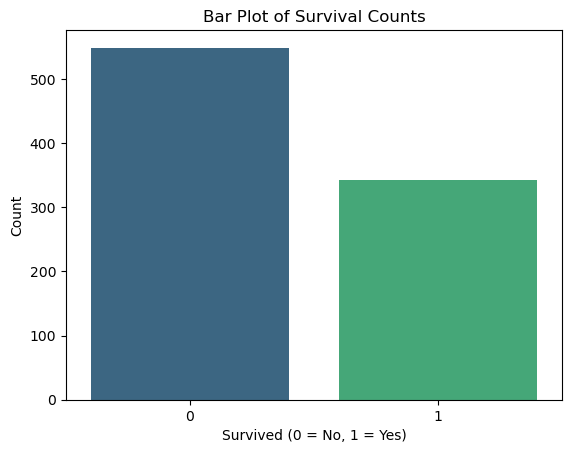

In [84]:
# 1. Bar plot for Survived 
# Create a bar plot for the 'Survived' variable
sns.countplot(data=df, x="Survived", palette="viridis")

# Add labels and title
plt.title("Bar Plot of Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Show the plot
plt.show()

Text(0, 0.5, 'Frequency')

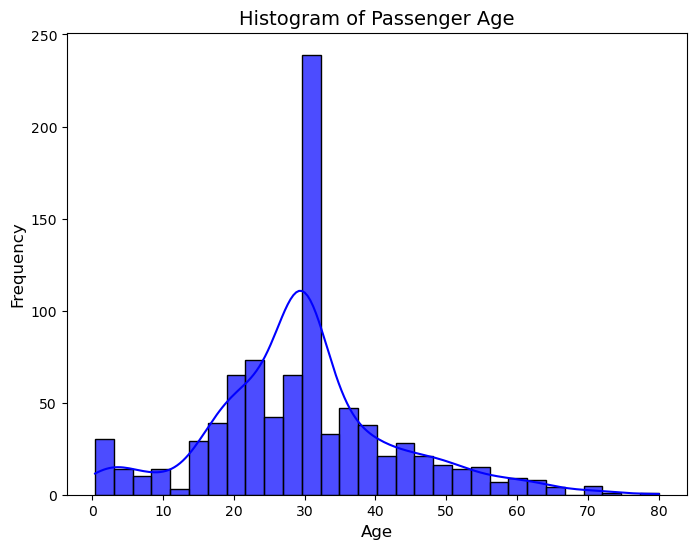

In [87]:
# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Age", kde=True, color="blue", alpha=0.7)

# Add labels and title
plt.title("Histogram of Passenger Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

In [92]:
# correlation matrix
correlation_df = df[['Fare','Age','SibSp','Parch']].corr()

<Axes: >

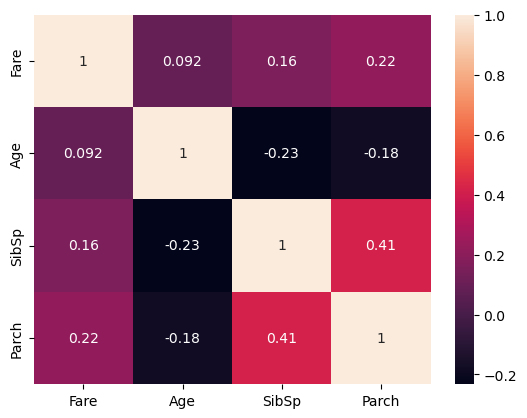

In [93]:
sns.heatmap(correlation_df ,annot=True)

### 4.🌟 Summarize Insights

Here are four key insights based on the correlation matrix of the variables **Fare**, **Age**, **SibSp**, and **Parch** in the Titanic dataset:

### 1. **Fare and Age are Weakly Correlated** 🤔
   - **Insight**: The correlation between **Fare** and **Age** is quite low, suggesting that the fare a passenger paid doesn't have a strong relationship with their age. Young and older passengers could have paid similar fares depending on their class and ticket type.

### 2. **SibSp and Parch are Moderately Correlated** 👫
   - **Insight**: **SibSp** (siblings/spouses aboard) and **Parch** (parents/children aboard) are moderately correlated, meaning passengers with more siblings or spouses tend to also travel with more parents or children. This could reflect family travel patterns on the Titanic.

### 3. **Fare and SibSp Show a Slight Negative Correlation** 💰➡️👨‍👩‍👧‍👦
   - **Insight**: There is a slight negative correlation between **Fare** and **SibSp**, indicating that passengers with more siblings/spouses aboard might have paid slightly lower fares on average. This could be due to the class or ticket type chosen for family groups.

### 4. **Fare and Parch Show a Slight Negative Correlation** 💵➡️👶
   - **Insight**: There is a slight negative correlation between **Fare** and **Parch**, suggesting that passengers traveling with more parents/children might have had slightly lower fares. This may be a result of larger family bookings in lower classes.